# An Analysis of FAANG Stocks during Corona Virus Pandemic ie 2020

### Importing the required libraries for the project

In [49]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

The stocks that are considered for this study are:
FANG - Facebook
AMZN - Amazon
AAPL - Apple
NFLX - Netflix
GOOG - Google

### Importing the required data from Yahoo data

In [50]:
# from on the companies will be refered by their tickers
AAPL = data.DataReader("AAPL", 'yahoo', '1/1/2020', '31/12/2020')
FANG = data.DataReader("FANG", 'yahoo', '1/1/2020', '31/12/2020')
NFLX = data.DataReader("NFLX", 'yahoo', '1/1/2020', '31/12/2020')
GOOG = data.DataReader("GOOG", 'yahoo', '1/1/2020', '31/12/2020')
AMZN = data.DataReader("AMZN",'yahoo', '1/1/2020', '31/12/2020')

In [18]:
tickers = ['AAPL','FANG','NFLX','GOOG','AMZN']

In [19]:
# Combining the above data into a single dataset
stock = pd.concat([AAPL,FANG,NFLX,GOOG,AMZN],axis = 1,keys = tickers)

In [22]:
stock.columns.names = ['Tickers','Stock_Info']

In [46]:
# checking the data 
stock.head()

Tickers          AAPL                                                \
Stock_Info       High        Low       Open      Close       Volume   
Date                                                                  
2018-12-31  39.840000  39.119999  39.632500  39.435001  140014000.0   
2019-01-02  39.712502  38.557499  38.722500  39.480000  148158800.0   
2019-01-03  36.430000  35.500000  35.994999  35.547501  365248800.0   
2019-01-04  37.137501  35.950001  36.132500  37.064999  234428400.0   
2019-01-07  37.207500  36.474998  37.174999  36.982498  219111200.0   

Tickers                      FANG                                     ...  \
Stock_Info  Adj Close        High        Low        Open       Close  ...   
Date                                                                  ...   
2018-12-31  38.461140   93.290001  91.070000   92.440002   92.699997  ...   
2019-01-02  38.505024   96.239998  89.860001   90.639999   95.220001  ...   
2019-01-03  34.669640   97.889999  94.330002   95.699997   96.160004  ...   
2019-01-04  36.149662  100.089996  97.089996   97.870003   99.930000  ...   
2019-01-07  36.069202  103.620003  99.730003  100.660004  102.629997  ...   

Tickers            GOOG                                            AMZN  \
Stock_Info         Open        Close   Volume    Adj Close         High   
Date                                                                      
2018-12-31  1050.959961  1035.609985  1493300  1035.609985  1520.760010   
2019-01-02  1016.570007  1045.849976  1532600  1045.849976  1553.359985   
2019-01-03  1041.000000  1016.059998  1841100  1016.059998  1538.000000   
2019-01-04  1032.589966  1070.709961  2093900  1070.709961  1594.000000   
2019-01-07  1071.500000  1068.390015  1981900  1068.390015  1634.560059   

Tickers                                                                  
Stock_Info          Low         Open        Close   Volume    Adj Close  
Date                                                                     
2018-12-31  1487.000000  1510.800049  1501.969971  6954500  1501.969971  
2019-01-02  1460.930054  1465.199951  1539.130005  7983100  1539.130005  
2019-01-03  1497.109985  1520.010010  1500.280029  6975600  1500.280029  
2019-01-04  1518.310059  1530.000000  1575.390015  9182600  1575.390015  
2019-01-07  1589.189941  1602.310059  1629.510010  7993200  1629.510010  

[5 rows x 30 columns]

# Checking the characteristics of the dataset

In [26]:
#finding the max values of all the stocks
stock.xs(key= 'Close',axis=1,level='Stock_Info').max()

Tickers
AAPL      73.412498
FANG     113.800003
NFLX     385.029999
GOOG    1361.170044
AMZN    2020.989990
dtype: float64

In [33]:
#Creating data set made up of returns of the above stocks
returns = pd.DataFrame()

In [48]:
for t in tickers:
    returns[t+'return'] = stock[t]['Close'].pct_change()
print(returns)

            AAPLreturn  FANGreturn  NFLXreturn  GOOGreturn  AMZNreturn
Date                                                                  
2018-12-31         NaN         NaN         NaN         NaN         NaN
2019-01-02    0.001141    0.027185    0.000000    0.009888    0.024741
2019-01-03   -0.099607    0.009872    0.013226   -0.028484   -0.025242
2019-01-04    0.042689    0.039205    0.097234    0.053786    0.050064
2019-01-07   -0.002226    0.027019    0.059717   -0.002167    0.034353
...                ...         ...         ...         ...         ...
2019-12-24    0.000951    0.012917    0.000300   -0.003914   -0.002114
2019-12-26    0.019840    0.012530   -0.001711    0.012534    0.044467
2019-12-27   -0.000379   -0.005914   -0.010642   -0.006256    0.000551
2019-12-30    0.005935    0.003305   -0.017564   -0.011650   -0.012253
2019-12-31    0.007307    0.019655    0.000804    0.000659    0.000514

[253 rows x 5 columns]


In [36]:
#creating visuals to find the nature of the data relations 
import seaborn as sns

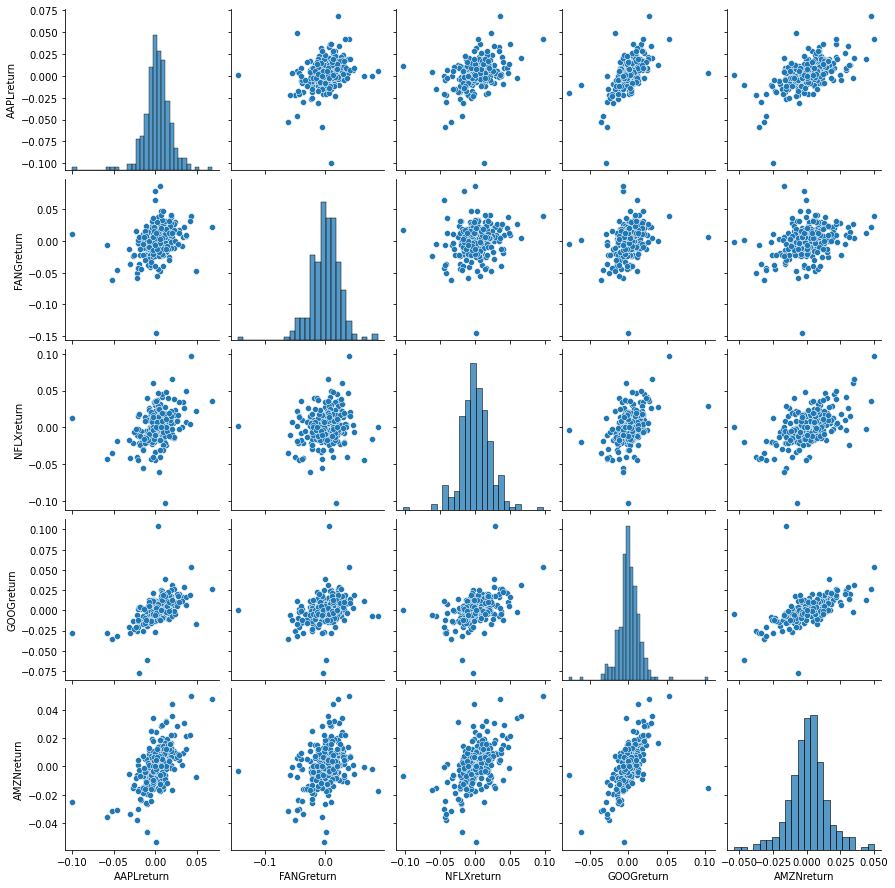

In [38]:
sns.pairplot(data = returns)

In [47]:
# Checking the min returns of stock and date
returns.idxmin()

AAPLreturn   2019-01-03
FANGreturn   2019-11-06
NFLXreturn   2019-07-18
GOOGreturn   2019-04-30
AMZNreturn   2019-02-01
dtype: datetime64[ns]

In [40]:
# Finding the dates of max values
returns.idxmax()

AAPLreturn   2019-01-30
FANGreturn   2019-09-16
NFLXreturn   2019-01-04
GOOGreturn   2019-07-26
AMZNreturn   2019-01-04
dtype: datetime64[ns]